<a href="https://colab.research.google.com/github/Bounyane/algorithm_AI/blob/master/build_Artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial neural network from scratch 


build Artificial neural network 

1.   build function for determinate number of hidden layer.
2.   build function for intialize parametres(weigths"W",coefficients"B").
3.   build function for claculate linear forward.(Wx+b)
4.   build activation functions (*Sigmoid,relu, leaky relu ,tanh*)
5.   build softmax function.
6.   build function for calculate linear activation forward.
7.   build function for compute cost by use (cross_entropy function).
8.   build function for calculat derivative of activation functions.
9.   build function for back backward propagation.
10.  build function for Update parametrs.
11.  build function for training model.
12.  build function for testing model.
13.  build function for showing accuracy and loss by use confustion matrix method.


In [1]:
#library
import numpy as np

In [2]:
#determinate number of hidden layer#
def ini_parametres(dim,labs):
  parametres={}
  for i in range(len(dim)-1):
    parametres["W"+str(i+1)]=np.random.rand(dim[i+1],dim[i])*labs
    parametres["B"+str(i+1)]=np.random.rand(dim[i+1],1)*labs
  return parametres

In [3]:
#calculat linear forward
def linear_forward(A,W,B):
    Z=np.dot(W,A)+B
    return Z

In [4]:
#Activation functions

def sigmoid(Z):
  A=1/(1+np.exp(-Z))
  return A

def relu(Z):
  A=np.maximum(0,Z)
  return A

def leaky_relu(Z,alpha=0.01):
   A=np.where(Z>0,Z,Z*alpha)
   return A

def tanh(Z):
    A=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return A 

In [5]:
#softmax function 
def softmax(Z):
  t=np.exp(Z)
  s=sum(t)
  soft=t/s
  return soft 

In [6]:
def linear_activation_forward(input,parametres,activation):
  A=input
  N=len(parametres)/2
  cache_z={}
  cache_a={}
  for i in range(1,int(N)+1):
    W= parametres["W"+str(i)] 
    B= parametres["B"+str(i)]
    Z=linear_forward(A,W,B)
    cache_z["Z"+str(i)]=Z
    if activation[i-1]=="relu" :
      A=relu(Z)
    elif activation[i-1]=="tanh" :
      A=tanh(Z)
    elif activation[i-1]=="leaky_relu" :
      A=leaky_relu(Z)  
    elif activation[i-1]=="sigmoid":
      A=sigmoid(Z)
    else :
      A=softmax(Z)
    cache_a["A"+str(i)]=A
  return A,cache_z,cache_a

In [7]:
#compute loss function 
def Loss_function(output,y):
  m=output.shape[1]
  l=y*np.log(output)
  loss=(sum(-sum(l).reshape(m,1)))
  return loss/m

In [8]:
#derivative of activation function
def D_sigmoid(Z):
  return sigmoid(Z)*(1-sigmoid(Z))
def D_relu(Z):
  return np.where(Z>=0,1,0)
def D_leaky_relu(Z,alpha):
  return np.where(Z>=0,1,alpha)
def D_tanh(Z):
  return 1-(tanh(Z)**2)

In [9]:
#backward propagation 
def D_Z(y,cache_a,cache_z,parametres,activation):
  N=len(cache_z)
  dZ_f=cache_a["A"+str(N)]-y
  dz={"dZ"+str(N):dZ_f}
  for i in range(N,0,-1):
    if activation[i-1]=="sigmoid":
       dz["dZ"+str(i)]=np.multiply(np.dot(parametres["W"+str(i+1)].T,dz["dZ"+str(i+1)]),D_sigmoid(cache_z["Z"+str(i)]))
    elif activation[i-1]=="tanh":
       dz["dZ"+str(i)]=np.multiply(np.dot(parametres["W"+str(i+1)].T,dz["dZ"+str(i+1)]),D_tanh(cache_z["Z"+str(i)]))
    elif activation[i-1]=="relu":
       dz["dZ"+str(i)]=np.multiply(np.dot(parametres["W"+str(i+1)].T,dz["dZ"+str(i+1)]),D_relu(cache_z["Z"+str(i)]))
    elif activation[i-1]=="leaky_relu": 
       dz["dZ"+str(i)]=np.multiply(np.dot(parametres["W"+str(i+1)].T,dz["dZ"+str(i+1)]),D_leaky_relu(cache_z["Z"+str(i)]))
  return dz

In [10]:
def D_WB(input,cache_a,dz):
  dw={}
  db={}
  m=input.shape[1]
  for i in range(len(cache_a),0,-1):
    if(i!=1):
     dw["W"+str(i)]=np.dot(dz["dZ"+str(i)],cache_a["A"+str(i-1)].T)/m
     db["B"+str(i)]=np.sum(dz["dZ"+str(i)],axis=1,keepdims=True)/m
    else:
     dw["W"+str(i)]=np.dot(dz["dZ"+str(i)],input.T)/m
     db["B"+str(i)]=np.sum(dz["dZ"+str(i)],axis=1,keepdims=True)/m
  return dw,db

In [11]:
#Update parametres
def Update_parametres(dw,db,parametres,learning_rate):
    new_parametres={}
    for i in range(1,len(dw)+1):
        new_parametres["W"+str(i)]=parametres["W"+str(i)]-learning_rate*dw["W"+str(i)]
        new_parametres["B"+str(i)]=parametres["B"+str(i)]-learning_rate*db["B"+str(i)]
    return new_parametres   

In [12]:
#training  Model
def fit_model(input,output,hidden_dim,activations_f,labs=0.1,learning_rate=0.08,iteration=1000,show_loss=False):
     parametres=ini_parametres(hidden_dim,labs)
     loss=[]
     for i in range(1,iteration):
       a,cache_z,cache_a=linear_activation_forward(input,parametres,activations_f)
       if show_loss==True and i%10==0:
          print("cost :",Loss_function(a,output))
       loss.append(Loss_function(a,output))
       dz=D_Z(output,cache_a,cache_z,parametres,activations_f)
       dw,db=D_WB(input,cache_a,dz)
       parametres=Update_parametres(dw,db,parametres,learning_rate)  
     return np.squeeze(loss),parametres  

In [13]:
#import dataset 
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_train.reshape(len(y_train), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded=onehot_encoded.T
print(onehot_encoded[0:10,1:5])
print(y_train[1:5])

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[0 4 1 9]


In [15]:

x_train=(x_train.reshape(60000,784).T/255)
y_train=onehot_encoded
print(x_train.shape)
print(y_train.shape)

(784, 60000)
(10, 60000)


cost : [2.30239793]
cost : [2.30220398]
cost : [2.30203758]
cost : [2.30189452]
cost : [2.30177121]
cost : [2.30166452]
cost : [2.30157177]
cost : [2.30149062]
cost : [2.30141904]
cost : [2.30135526]
cost : [2.30129771]
cost : [2.30124499]
cost : [2.30119585]
cost : [2.30114912]
cost : [2.30110374]
cost : [2.30105866]
cost : [2.30101287]
cost : [2.30096534]
cost : [2.30091503]
cost : [2.30086079]
cost : [2.30080138]
cost : [2.30073542]
cost : [2.30066131]
cost : [2.3005772]
cost : [2.3004809]
cost : [2.30036976]
cost : [2.30024058]
cost : [2.3000894]
cost : [2.29991132]
cost : [2.29970016]
cost : [2.29944808]
cost : [2.29914501]
cost : [2.29877788]
cost : [2.29832951]
cost : [2.29777702]
cost : [2.29708951]
cost : [2.29622451]
cost : [2.29512254]
cost : [2.29369842]
cost : [2.29182703]
cost : [2.28931931]
cost : [2.28588086]
cost : [2.28104039]
cost : [2.27403082]
cost : [2.26362089]
cost : [2.24799927]
cost : [2.22512398]
cost : [2.19417511]
cost : [2.15744634]
cost : [2.11989449]
cos

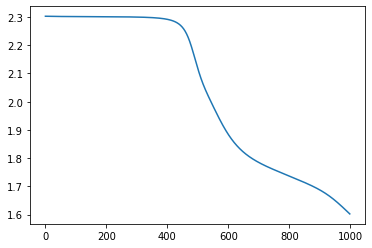

In [16]:
 import matplotlib.pyplot as plt

dim=[784,10,7,10]
activations=["tanh","tanh","softmax"]
loss,_=fit_model(x_train,y_train,dim,activations,iteration=1000,labs=0.01,show_loss=True)
plt.plot(loss)
plt.show()


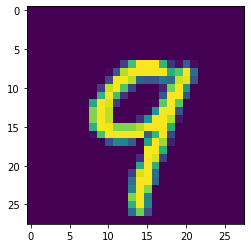

(28, 28)
the number of image is :  9


In [42]:

simple=x_test[12] #select index of image from test dataset

plt.imshow(simple)
plt.show()
print(simple.shape)
simple_=simple.reshape(784,1)/255
Ypre=linear_activation_forward(simple_,_,["tanh","tanh","softmax"])[0]
Ypre=Ypre.reshape(10)
Ypre=list(Ypre)
print("the number of image is : ",Ypre.index(np.max(Ypre)))